In [20]:
##This is to analyze the sequences I get back from the libraries and eventually plot in PyMol figures. I am going to import the
##Nucleotide alignment after exporting a FASTA file from Geneious. This is made by aligning the chromatograms from Sanger reads.

#Importing the necessary libraries
import sys
from os import listdir
from os.path import isfile, join

import re

import pandas as pd

import Bio
from Bio import AlignIO

from pylab import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kendalltau

#Setting matplotlib to be inline, and setting the fonttype for the pdf export to be consistent in Illustrator.
%matplotlib inline

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

#Set the root directory
root_dir = './Data';

In [21]:
###Classes defined###
class FASTAClass:
    def __init__(self, id, seq):        
        self.id = id        
        self.seq = seq

###Functions used here###
def sequenceCleaner(mutants):
    # Create our hash table to add the sequences
    seqHash={}
    seqUnique = []

    # Using the Biopython fasta parse we can read our fasta input
    for seq_record in mutants[1:]:
        # Take the current sequence
        sequence = str(seq_record.seq).upper()
        # If the sequence passed in the test "is it clean?" and it isn't in the
        # hash table, the sequence and its id are going to be in the hash
        if sequence not in seqHash:
            seqHash[sequence] = seq_record.id
        # If it is already in the hash table, we're just gonna concatenate the ID
        # of the current sequence to another one that is already in the hash table
        else:
            seqHash[sequence] += "_" + seq_record.id.split("_")[-3].split("-")[-1]
    
    # Making the final FASTAClass for the unique sequences
    seqUnique.append(FASTAClass(mutants[0].id, mutants[0].seq))
    for sequence in seqHash:
        seqUnique.append(FASTAClass(seq_record.id.split("_")[-3], sequence))
            
    return seqUnique

In [22]:
#Set the data directory
data_dir = '';

#Pick a test data file
data_file = root_dir+data_dir
#print(root_dir+data_dir)

#Printing file list
fileList = [f for f in listdir(root_dir+data_dir) if f.endswith(".fasta")]
print("\n".join(fileList))

E-021_TMH4-6_v3-org_nucl-align.fasta
E-021_TMH4-6_v3-sort04_nucl-align.fasta


In [27]:
##Input an alignment for the analysis, and run my pre-cleaning on the Alignment.

alignFile = data_file+"/E-021_TMH4-6_v3-org_nucl-align.fasta"
testAlignment = AlignIO.read(open(alignFile), "fasta")
print("Alignment length %i" % testAlignment.get_alignment_length())
print("Alignment size %i" % len(testAlignment))
#for record in testAlignment :
#    print(record.seq[:120])

#print(testAlignment[1].seq)
#print(testAlignment[1].seq.ungap("-").translate())

reducedTestAlignment = []
for record in testAlignment:
    if (record.seq.count("-") == 0):
        reducedTestAlignment.append(record)

print("Reduced alignment size %i" % len(reducedTestAlignment))
#for record in reducedTestAlignment:
#    print(record.seq.translate())

cleanedTestAlignment = sequenceCleaner(reducedTestAlignment)
print("Cleaned alignment size %i" % len(cleanedTestAlignment))
print(cleanedTestAlignment[0].id, cleanedTestAlignment[0].seq)

#print(record.id.split("_")[-3].split("-")[-1])

Alignment length 483
Alignment size 86
Reduced alignment size 77
Cleaned alignment size 70
YALI0E05973-pSS021_(modified)_TMH4-6_ROI_extraction TACCATTCGTGGAGTTTGACATTGGTGATCATGGCAGGTTTACCTATAATTGTTCTGGTAGCTATGGGAGTGGCACCTCGTCTTCAGAGACACTTCAGAGACTACAAGGGGGTTATCACTGACGCTTCCGTCATGATTGACTGGTCTATGTCCGGCCTACAACATGTCAAGCTCTCCAACGGCGAGAAGAAACAAATGTCGATTCTTCAGTATCAGATGCATCTTGCTACCATATGCTACATGAAGTTCACAACATGGTCTGCTGCTCAGCAGGCGTTCATGCAGGTACTTGCACTGATCATGTTCGTCCAGGGTTTCTGGTTTGGGGCCAAGCAGGTTCAAATCGGAAACTTGACTGCTGGAGCGGTCATGACCTGTTTCTTTTCGGCAATGGCTGTCACGTCCCATATTGCTTCCATCACCGGACAGATGATGTCGATCATGAAAGCCATGGTATCTGCAGGACTCGTCAACCAGCTCATC


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text yticklabel objects>)

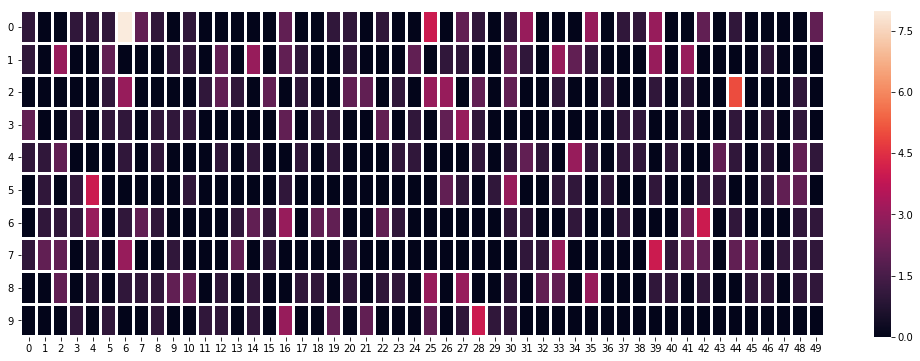

In [49]:
##I am going to write code that gives the number of variation in each column.
#mutantCounts = [[0 for col in range(len(cleanedTestAlignment[0].seq))] for row in range(len(cleanedTestAlignment)-1)]
mutantCounts = [0 for col in range(len(cleanedTestAlignment[0].seq))]

#print(len(cleanedTestAlignment[1].seq))

seqCount = 0
for record in cleanedTestAlignment[1:]:
    residueCount = 0
    for residue in record.seq:
        #print(residue, residueCount, seqCount)
        if residue != cleanedTestAlignment[0].seq[residueCount]:
            mutantCounts[residueCount] += 1
        residueCount += 1
    seqCount +=1

#print(seqCount, residueCount)
#print(mutantCounts)

heatMapMutations = [[0 for i in range(50)] for j in range(len(cleanedTestAlignment[0].seq)//50+1)]

for iterCount in range(len(cleanedTestAlignment[0].seq)):
    #print(iterCount)
    heatMapMutations[(iterCount)//50][(iterCount)%50] = mutantCounts[iterCount]
#print(heatMapMutations)

fig1 = figure(figsize=(18,6))
ax = sns.heatmap(heatMapMutations, linewidths=2)
plt.yticks(rotation=0)